In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import wandb
api = wandb.Api()


In [5]:
# function to fetch run data: from wandb link to dataframe 
def wandb2df(run_link, api=api):
    run = api.run(run_link)
    return pd.DataFrame(run.history())

In [ ]:
# columns of dataframe that are of interest
steps_col = '_step'
loss_cols = ['average_policy_loss','average_value_loss']
eval_cols = ['eval_eprewmean','eval_eplenmean']
train_cols = ['eprewmean','eplenmean']

In [41]:
def plot_wandb_comparison(df_b, df_r, column_name, ax=None, steps_col = 'total_steps'):
    # df_b = bilinear run.history dataframe
    # df_r = relu run.history dataframe
    # get rid of nans
    df_b= df_b[[steps_col, column_name]].dropna()
    df_r=df_r[[steps_col, column_name]].dropna()

    if ax is None:
        _, ax = plt.subplots()
    
    ax.plot(df_b[steps_col],df_b[column_name], 'r', label='Bilinear')
    ax.plot(df_r[steps_col],df_r[column_name], 'b', label='ReLU')
    return ax

In [19]:
# relu heist
relu_heist_link = '/narmal/bilinear_versus_relu/runs/m3w58v1k'
relu_heist = wandb2df(relu_heist_link)

# relu maze
relu_maze_link = '/narmal/bilinear_versus_relu/runs/r1ipocut'
relu_maze = wandb2df(relu_maze_link)

# bilinear heist
bilinear_heist_link = '/narmal/bilinear_versus_relu/runs/vdzhnra0'
bilinear_heist = wandb2df(bilinear_heist_link)

# bilinear maze
bilinear_maze_link = '/narmal/bilinear_versus_relu/runs/6hmoplvm'
bilinear_maze = wandb2df(bilinear_maze_link)


In [29]:
bilinear_maze[['total_steps', loss_cols[0]]]

,total_steps,average_policy_loss
0,NaN,NaN
1,11520.0,NaN
2,12544.0,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
495,2074880.0,NaN
496,NaN,NaN
497,NaN,NaN
498,NaN,NaN


Text(0.5, 1.0, 'eval_eplenmean')

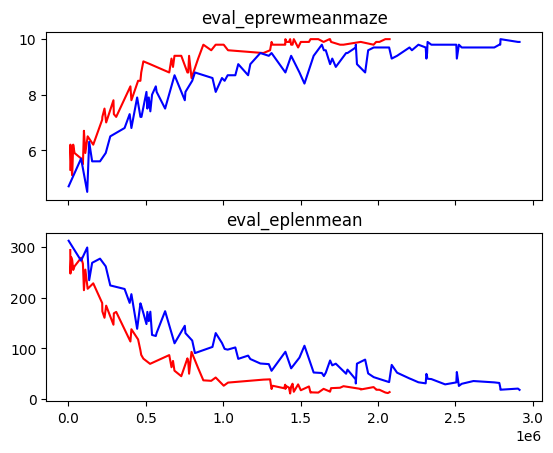

In [ ]:
f, ax = plt.subplots(2,1)
ax[0] = plot_wandb_comparison(bilinear_maze, relu_maze, eval_cols[0], ax=ax[0])
ax[0].set_title(eval_cols[0]+' maze')
ax[0].set_xticklabels([])
ax[1] = plot_wandb_comparison(bilinear_maze, relu_maze, eval_cols[1], ax=ax[1])
ax[1].set_title(eval_cols[1])


Text(0.5, 1.0, 'eval_eplenmean')

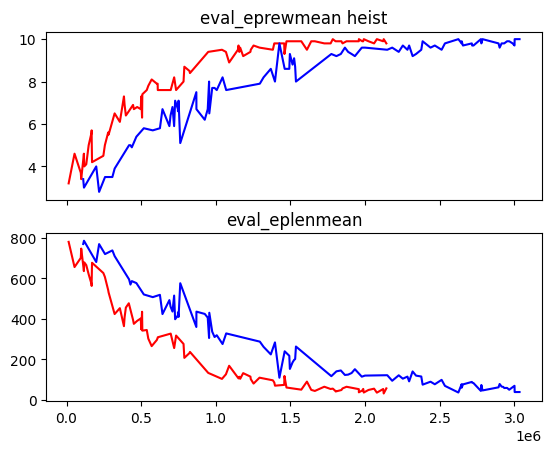

In [44]:
f, ax = plt.subplots(2,1)
ax[0] = plot_wandb_comparison(bilinear_heist, relu_heist, eval_cols[0], ax=ax[0])
ax[0].set_title(eval_cols[0]+' heist')
ax[0].set_xticklabels([])
ax[1] = plot_wandb_comparison(bilinear_heist, relu_heist, eval_cols[1], ax=ax[1])
ax[1].set_title(eval_cols[1])


Text(0.5, 1.0, 'average_value_loss')

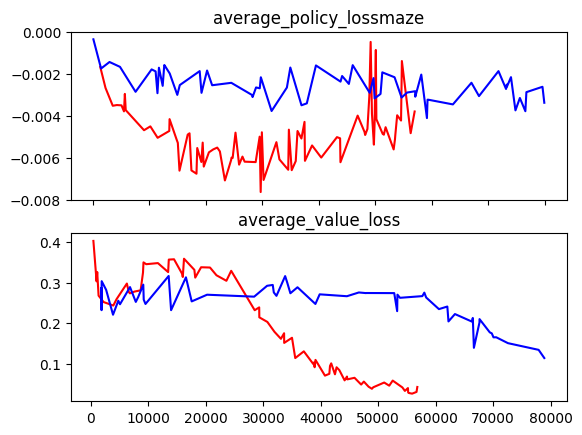

In [ ]:
f, ax = plt.subplots(2,1)
ax[0] = plot_wandb_comparison(bilinear_maze, relu_maze, loss_cols[0], ax=ax[0], steps_col='_step')
ax[0].set_title(loss_cols[0] + ' maze')
ax[0].set_xticklabels([])
ax[1] = plot_wandb_comparison(bilinear_maze, relu_maze, loss_cols[1], ax=ax[1], steps_col='_step')
ax[1].set_title(loss_cols[1])